# Non-parametric methods and deep learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_text, plot_tree, DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [ ]:
data = pd.read_csv('data/mushroom_data.csv')
print(data.shape)
data.head(5)

(8123, 22)


,y,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,edible,convex,smooth,yellow,1,almond,free,close,broad,black,...,smooth,smooth,white,white,white,1,pendant,brown,numerous,grasses
1,edible,bell,smooth,white,1,anise,free,close,broad,brown,...,smooth,smooth,white,white,white,1,pendant,brown,numerous,meadows
2,poisonous,convex,scaly,white,1,pungent,free,close,narrow,brown,...,smooth,smooth,white,white,white,1,pendant,black,scattered,urban
3,edible,convex,smooth,gray,0,none,free,crowded,broad,black,...,smooth,smooth,white,white,white,1,enanescent,brown,abundant,grasses
4,edible,convex,scaly,yellow,1,almond,free,close,broad,brown,...,smooth,smooth,white,white,white,1,pendant,black,numerous,grasses


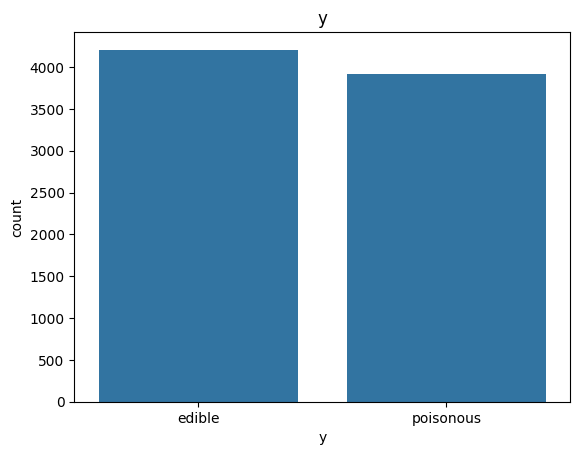

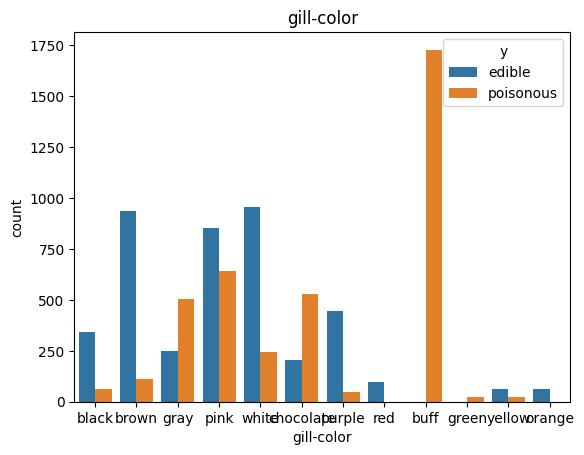

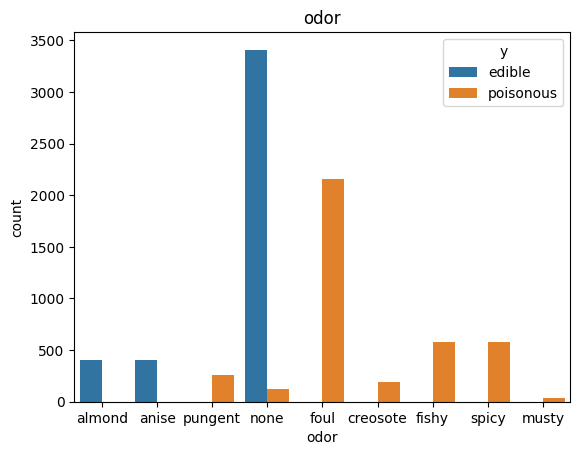

In [4]:
sns.countplot(x = "y", data = data)
plt.title("y")
plt.show()

# some features to visualize
sns.countplot(x = "gill-color", data = data, hue='y')
plt.title("gill-color")
plt.show()

sns.countplot(x = "odor", data = data, hue='y')
plt.title("odor")
plt.show()

In [5]:
y = np.where(data['y'] == "edible", 1, 0)

X = data.columns[1:]
X = data[X]
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,convex,smooth,yellow,1,almond,free,close,broad,black,enlarging,...,smooth,smooth,white,white,white,1,pendant,brown,numerous,grasses
1,bell,smooth,white,1,anise,free,close,broad,brown,enlarging,...,smooth,smooth,white,white,white,1,pendant,brown,numerous,meadows
2,convex,scaly,white,1,pungent,free,close,narrow,brown,enlarging,...,smooth,smooth,white,white,white,1,pendant,black,scattered,urban
3,convex,smooth,gray,0,none,free,crowded,broad,black,tapering,...,smooth,smooth,white,white,white,1,enanescent,brown,abundant,grasses
4,convex,scaly,yellow,1,almond,free,close,broad,brown,enlarging,...,smooth,smooth,white,white,white,1,pendant,black,numerous,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,knobbed,smooth,brown,0,none,attached,close,broad,yellow,enlarging,...,smooth,smooth,orange,orange,orange,1,pendant,buff,clustered,leaves
8119,convex,smooth,brown,0,none,attached,close,broad,yellow,enlarging,...,smooth,smooth,orange,orange,brown,1,pendant,buff,several,leaves
8120,flat,smooth,brown,0,none,attached,close,broad,brown,enlarging,...,smooth,smooth,orange,orange,orange,1,pendant,buff,clustered,leaves
8121,knobbed,scaly,brown,0,fishy,free,close,narrow,buff,tapering,...,smooth,silky,white,white,white,1,enanescent,white,several,leaves


In [6]:
ab = data['odor'].unique()
ab

array(['almond', 'anise', 'pungent', 'none', 'foul', 'creosote', 'fishy',
       'spicy', 'musty'], dtype=object)

In [7]:
# getdummies() was used for one-hot encoding of categorical features
X = pd.get_dummies(X)
X

,bruises,ring-number,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1,1,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,1,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1,1,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
3,0,1,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,1,1,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,1,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
8119,0,1,False,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
8120,0,1,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
8121,0,1,False,False,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,False


In [8]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)

(5442, 113)
(2681, 113)


In [9]:
clf = DecisionTreeClassifier(random_state=42, max_depth=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("accuracy of Decision Tree : ", accuracy)

accuracy of Decision Tree :  0.9552405818724357


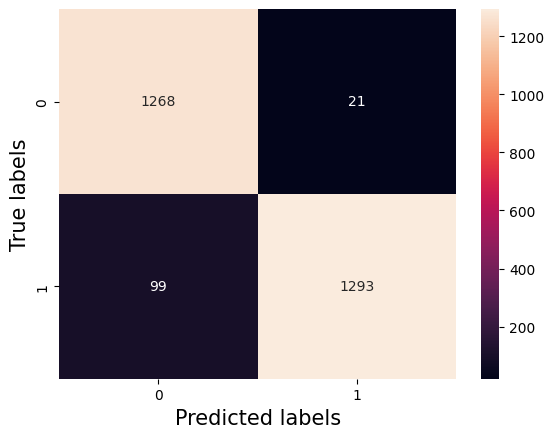

In [10]:
confmat = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(confmat,annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
plt.show()

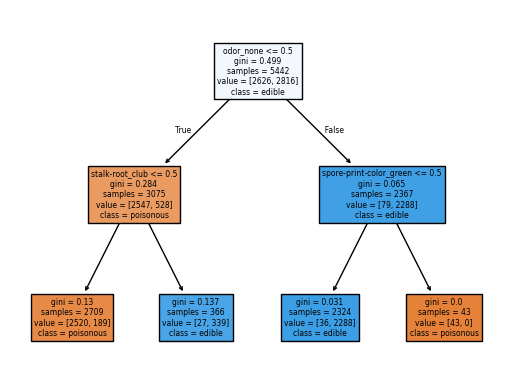

True

In [12]:
plot_tree(clf, feature_names = list(X.columns),  filled = True, class_names=["poisonous", "edible"])
plt.show()

# to get an image of the tree as a pdf
import pydotplus
d_tree = export_graphviz(clf, feature_names = list(X.columns), filled = True, class_names=["poisonous", "edible"])
pydot_graph = pydotplus.graph_from_dot_data(d_tree)
pydot_graph.write_pdf('mushroom_tree.pdf')

# Neural Networks

In [13]:
weights_1 = np.array([1., 2., 1.])     # a vector represents [w11, w12, w13]
bias = np.array([0., -2., -2.])          # a vector represents [bias1, bias2, bias3]
weights_2 = np.array([1, -1, 1])         # a vector represents [w21, w22, w23]

In [14]:
def hidden(x, weights_1, bias):

    hidden_x = x * weights_1 + bias
    return np.maximum(hidden_x, 0) # Apply the ReLU activation

def network(x, weights_1, bias, weights_2):

    hidden_x = hidden(x, weights_1, bias) # Calculate the hidden activations
    final_x = hidden_x * weights_2 # Multiply them with the final weights [w21, w22, w23]
    return sum(final_x) # Sum the result to obtain the final prediction

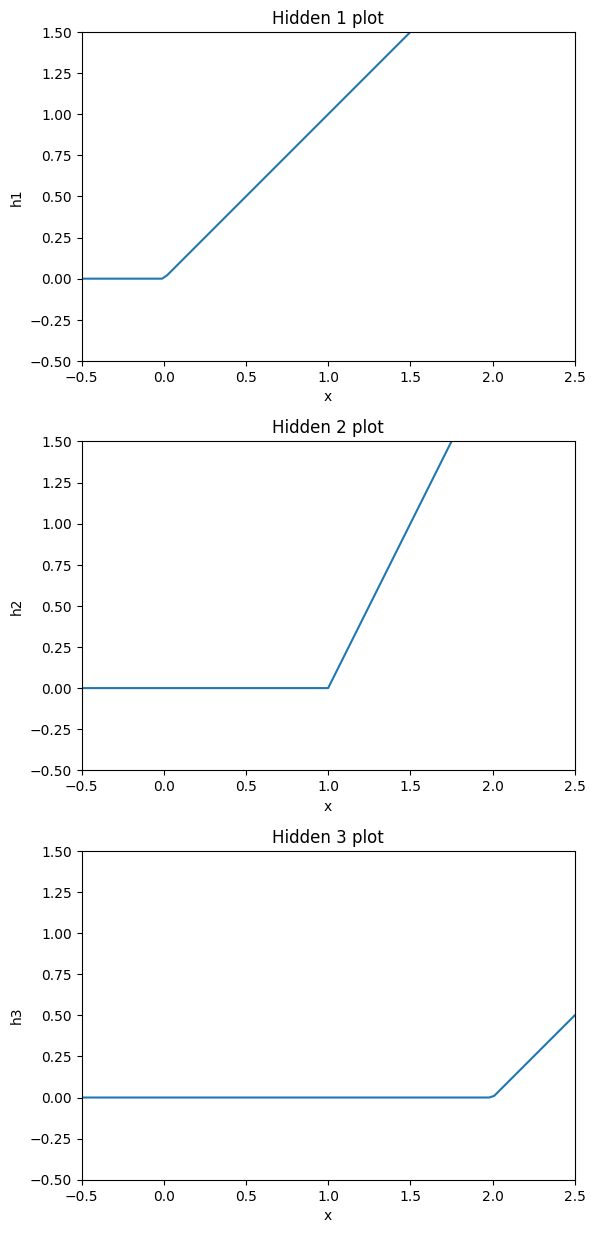

In [15]:
# X values to serve as inputs for our network for plotting
x_to_plot = np.linspace(-0.5, 2.5, 99)
plt.figure(figsize=(10, 12))
for i in range(3):
    plt.tight_layout()
    plt.subplot(3, 1, i + 1)

    # Compute the hidden layer activations
    hidden_to_plot = [hidden(x, weights_1, bias)[i] for x in x_to_plot]

    # Make sure all plots use the same scale
    plt.xlim(-0.5, 2.5)
    plt.ylim(-0.5, 1.5)
    plt.gca().set_aspect('equal', adjustable='box')

    # Plot the hidden layer activations
    plt.title(f'Hidden {i + 1} plot')
    plt.xlabel('x')
    plt.ylabel(f'h{i + 1}')
    plt.plot(x_to_plot, hidden_to_plot)

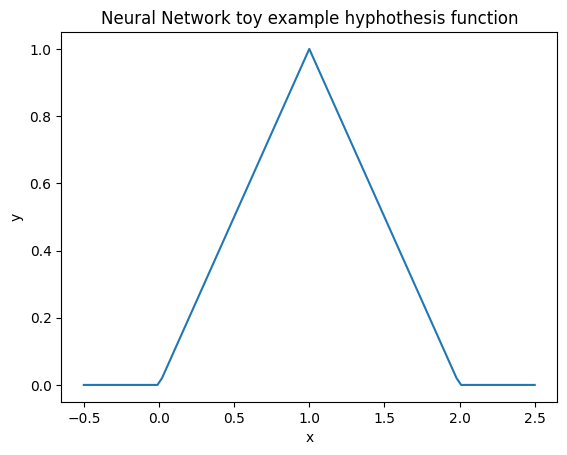

In [16]:
# Use our network to obtain y values
y_to_plot = [network(x, weights_1, bias, weights_2) for x in x_to_plot]
plt.title('Neural Network toy example hyphothesis function')
plt.xlabel('x')
plt.ylabel('y')
_ = plt.plot(x_to_plot, y_to_plot)

In [ ]:
data = pd.read_csv('data/FMIData.csv')

# drop unrelevant columns
data.drop(columns=['Time zone','Precipitation amount (mm)','Snow depth (cm)',\
                 'Ground minimum temperature (degC)','Maximum temperature (degC)', 'Minimum temperature (degC)'],inplace=True)
data.columns =['year','m','d','time','air temperature'] # rename columns

# Select only weather recordings whose property 'time' is equal to `00:00`
data = data[data['time'] == '00:00']

# Shift the column 'air temperatrue' by different periods to obtain history records
data['pre_1'] = data['air temperature'].shift(1)
data['pre_2'] = data['air temperature'].shift(2)
data['pre_3'] = data['air temperature'].shift(3)
data['pre_4'] = data['air temperature'].shift(4)
data['pre_5'] = data['air temperature'].shift(5)

data = data.iloc[5:] # drop the first 5 rows which involves NAN
data.head()

,year,m,d,time,air temperature,pre_1,pre_2,pre_3,pre_4,pre_5
10,2020,1,6,00:00,1.5,-1.6,1.7,4.6,3.6,1.5
12,2020,1,7,00:00,4.5,1.5,-1.6,1.7,4.6,3.6
14,2020,1,8,00:00,5.3,4.5,1.5,-1.6,1.7,4.6
16,2020,1,9,00:00,2.1,5.3,4.5,1.5,-1.6,1.7
18,2020,1,10,00:00,-2.0,2.1,5.3,4.5,1.5,-1.6


In [19]:
X = data[['pre_1', 'pre_2', 'pre_3', 'pre_4', 'pre_5']].values
y = data['air temperature'].values

print(X)
print(y.shape)

[[ -1.6   1.7   4.6   3.6   1.5]
 [  1.5  -1.6   1.7   4.6   3.6]
 [  4.5   1.5  -1.6   1.7   4.6]
 ...
 [ -2.2  -7.2 -15.4 -14.2 -13. ]
 [  0.1  -2.2  -7.2 -15.4 -14.2]
 [  1.2   0.1  -2.2  -7.2 -15.4]]
(708,)


In [20]:
X_train, X_val,  y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
## define a list of values for the maximum polynomial degree
degrees = [1,2,3,4]

linear_tr_errors = []
linear_val_errors = []
for degree in degrees:
    lin_regr = LinearRegression(fit_intercept=False)
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)

    # apply linear regression to these new features and labels
    lin_regr.fit(X_train_poly, y_train)
    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error = mean_squared_error(y_train, y_pred_train)
    X_val_poly = poly.transform(X_val)
    y_pred_val = lin_regr.predict(X_val_poly)

    # calculate the validation error
    val_error = mean_squared_error(y_val, y_pred_val)

    linear_tr_errors.append(tr_error)
    linear_val_errors.append(val_error)

In [22]:
# table to compare training and validation errors
errors = {"poly degree":degrees,
          "linear_train_errors":linear_tr_errors,
          "linear_val_errors":linear_val_errors,
         }
pd.DataFrame({ key:pd.Series(value) for key, value in errors.items()})

,poly degree,linear_train_errors,linear_val_errors
0,1,3.947190,5.547871
1,2,3.789401,5.444261
2,3,3.344839,5.818018
3,4,2.679989,18.741724


In [23]:
from sklearn.neural_network import MLPRegressor

## define a list of values for the number of hidden layers
num_layers = [1,2,4,6,8,10]
num_neurons = 15  # number of neurons in each layer

mlp_tr_errors = []
mlp_val_errors = []

for i, num in enumerate(num_layers):
    hidden_layer_sizes = tuple([num_neurons]*num) # size (num of neurons) of each layer stacked in a tuple

    mlp_regr = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=1000, random_state=42)

    mlp_regr.fit(X_train, y_train)

    ## evaluate the trained MLP on both training set and validation set
    y_pred_train = mlp_regr.predict(X_train)
    tr_error = mean_squared_error(y_train, y_pred_train)
    y_pred_val = mlp_regr.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred_val)

    mlp_tr_errors.append(tr_error)
    mlp_val_errors.append(val_error)

print(mlp_tr_errors)

[3.7489094439046653, 3.619270538941888, 3.523817650546987, 3.6846360916156553, 3.8807597540060343, 3.014632935554798]


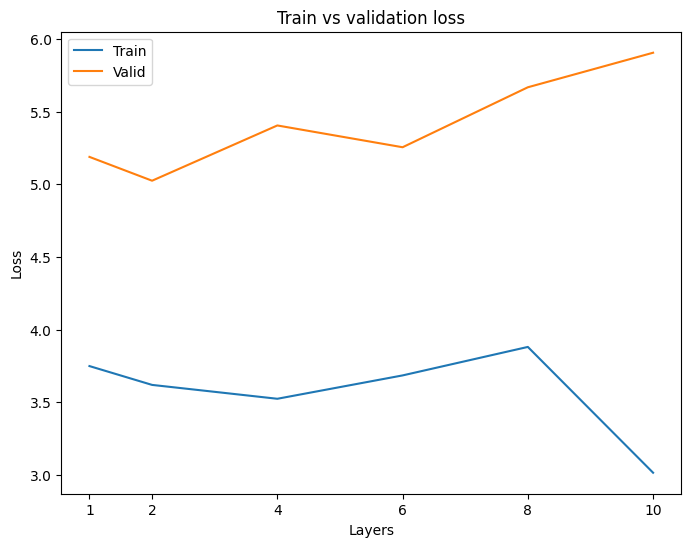

In [24]:
plt.figure(figsize=(8, 6))

plt.plot(num_layers, mlp_tr_errors, label = 'Train')
plt.plot(num_layers, mlp_val_errors,label = 'Valid')
plt.xticks(num_layers)
plt.legend(loc = 'upper left')

plt.xlabel('Layers')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

In [25]:
# table to compare the training and validation errors for MLPs with different number of hidden layers
errors = {"num_hidden_layers":num_layers,
          "mlp_train_errors":mlp_tr_errors,
          "mlp_val_errors":mlp_val_errors,
         }
pd.DataFrame(errors)

,num_hidden_layers,mlp_train_errors,mlp_val_errors
0,1,3.748909,5.189208
1,2,3.619271,5.025214
2,4,3.523818,5.405671
3,6,3.684636,5.255682
4,8,3.880760,5.668580
5,10,3.014633,5.906500


As we can see by comparing the errors from Polynomial and MLP, MLP is a bit better than PolynomialRegression